In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Imported the required libraries here

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Need to run the csv file to get the dataset. This dataset is related to temperature forecast. we need to predict the minimum and maximum temperture from the dataset.

In [3]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [4]:
df['station'].fillna(df['station'].mode()[0], inplace=True)

In [5]:
df['Date'].fillna(df['Date'].mode()[0], inplace=True)

In [6]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mode()[0], inplace=True)

In [7]:
df['Present_Tmin'].fillna(df['Present_Tmin'].mode()[0], inplace=True)

In [8]:
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mode()[0], inplace=True)

In [9]:
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mode()[0], inplace=True)

In [10]:
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mode()[0], inplace=True)

In [11]:
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mode()[0], inplace=True)

In [12]:
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mode()[0], inplace=True)

In [13]:
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mode()[0], inplace=True)

In [14]:
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mode()[0], inplace=True)

In [15]:
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mode()[0], inplace=True)

In [16]:
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mode()[0], inplace=True)

In [17]:
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mode()[0], inplace=True)

In [18]:
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mode()[0], inplace=True)

In [19]:
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mode()[0], inplace=True)

In [20]:
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mode()[0], inplace=True)

In [21]:
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mode()[0], inplace=True)

In [22]:
df['Next_Tmax'].fillna(df['Next_Tmax'].mode()[0], inplace=True)

In [23]:
df['Next_Tmin'].fillna(df['Next_Tmin'].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Removed the null values from the dataset so that we can predict the proper temparature from the dataset

In [25]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [26]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,7.057092,61.768678,0.365206,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.271491,22.934198
std,7.213213,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,2.212072,34.383864,0.263668,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.123085,2.483502
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [27]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Date']


Numerical Columns:  ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


Need to check the categorical and numerical data from the dataset

<AxesSubplot:>

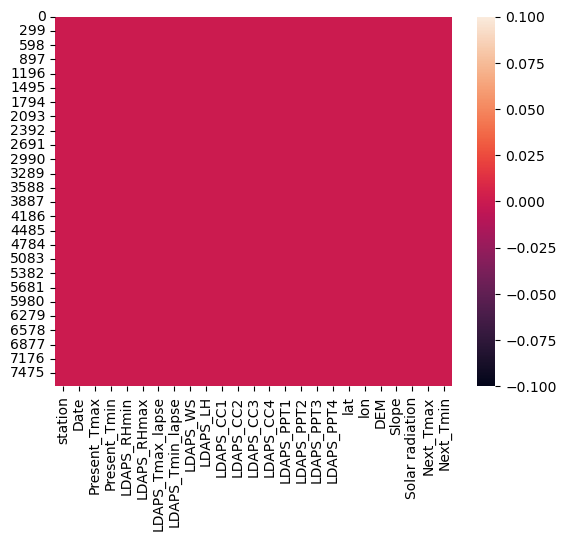

In [28]:
sns.heatmap(df.isnull())

Created the heatmap for the null values

In [29]:
df.skew()

station             0.000100
Present_Tmax       -0.276483
Present_Tmin       -0.375457
LDAPS_RHmin         0.202176
LDAPS_RHmax        -1.109283
LDAPS_Tmax_lapse   -0.601161
LDAPS_Tmin_lapse   -0.851245
LDAPS_WS            1.485885
LDAPS_LH            0.586176
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.336871
Next_Tmin          -0.406685
dtype: float64

In [30]:
df['LDAPS_WS'] = np.cbrt(df['LDAPS_WS'])

In [31]:
df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])

In [32]:
df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

In [33]:
df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

In [34]:
df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

In [35]:
df['DEM'] = np.cbrt(df['DEM'])

In [36]:
df['Slope'] = np.cbrt(df['Slope'])

In [37]:
df.skew()

station             0.000100
Present_Tmax       -0.276483
Present_Tmin       -0.375457
LDAPS_RHmin         0.202176
LDAPS_RHmax        -1.109283
LDAPS_Tmax_lapse   -0.601161
LDAPS_Tmin_lapse   -0.851245
LDAPS_WS            0.712775
LDAPS_LH            0.586176
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          1.976295
LDAPS_PPT2          2.284577
LDAPS_PPT3          2.593630
LDAPS_PPT4          2.872150
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
Next_Tmax          -0.336871
Next_Tmin          -0.406685
dtype: float64

Reduced the skewness of the dataset with the codes

In [38]:
df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])

In [39]:
df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

In [40]:
df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

In [41]:
df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

In [42]:
df.drop(['Date'], axis=1, inplace=True)

In [43]:
df.drop(['station'], axis=1, inplace=True)

In [44]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,1.899572,61.768678,0.365206,0.352635,...,0.277517,0.245802,0.203712,37.544722,126.991397,3.695472,0.952418,5341.502803,30.271491,22.934198
std,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,0.186461,34.383864,0.263668,0.259164,...,0.422860,0.389234,0.372460,0.050352,0.079435,0.975449,0.357471,429.158867,3.123085,2.483502
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,1.423182,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,2.312721,0.461787,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,1.780840,36.776474,0.141643,0.136090,...,0.000000,0.000000,0.000000,37.510200,126.937000,3.061686,0.647366,4999.018555,28.200000,21.400000
50%,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,1.869251,56.487289,0.312156,0.309148,...,0.000000,0.000000,0.000000,37.550700,126.995000,3.575659,0.851784,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,2.000622,83.904586,0.571696,0.554963,...,0.634837,0.578273,0.000000,37.577600,127.042000,3.911219,1.209143,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,2.795982,213.414006,0.967277,0.968353,...,1.407087,1.359283,1.366874,37.645000,127.135000,5.965871,1.730057,5992.895996,38.900000,29.800000


In [45]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.896289,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,5.965871,1.406938,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.785468,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,3.550622,0.801092,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.830969,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,3.217444,0.643203,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.781083,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,3.575659,1.363477,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.789965,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,3.272250,0.796600,5859.552246,31.2,22.5


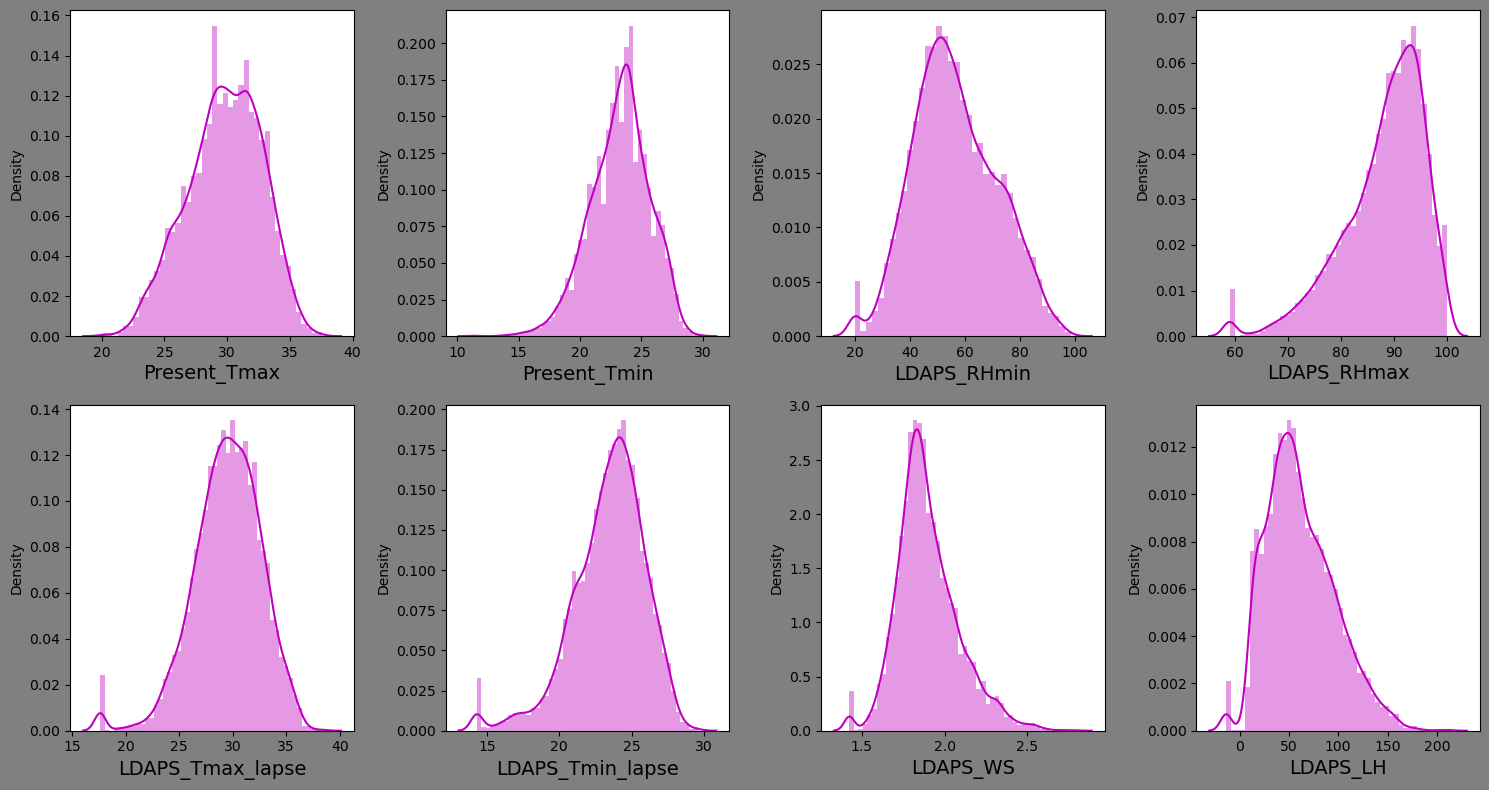

In [46]:
plt.figure(figsize=(15,8), facecolor= "grey")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created the distplot from the dataset to verify the skewness of the dataset

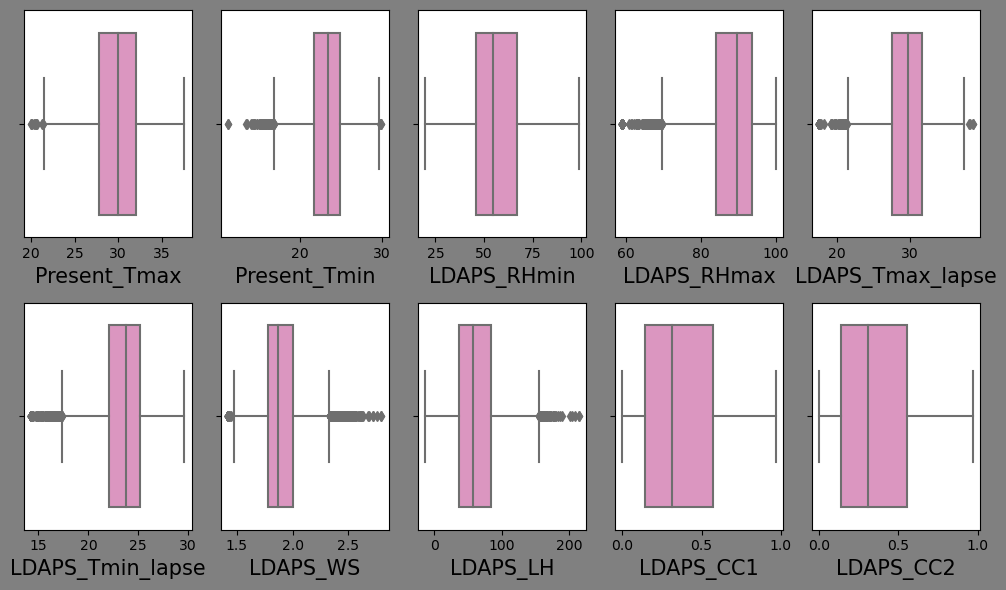

In [47]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Created the boxplot from the dataset to check the skewness and outliers

In [48]:
cor= df.corr()
cor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.619221,-0.214998,-0.305792,0.501246,0.554768,-0.130653,0.116041,-0.318215,-0.220476,...,-0.159657,-0.131601,-0.121079,-0.053099,0.008635,-0.172456,-0.110038,-0.024943,0.608681,0.621846
Present_Tmin,0.619221,1.000000,0.090367,-0.059385,0.384882,0.666980,-0.051853,-0.035814,0.066901,0.073381,...,0.090888,-0.017023,-0.104181,-0.078764,-0.043659,-0.256263,-0.165528,0.053823,0.470941,0.796333
LDAPS_RHmin,-0.214998,0.090367,1.000000,0.611314,-0.419389,0.167924,0.321530,-0.015007,0.623117,0.749330,...,0.604666,0.506691,0.343322,0.084541,-0.073998,0.087314,0.098845,0.248989,-0.454425,0.070956
LDAPS_RHmax,-0.305792,-0.059385,0.611314,1.000000,-0.182835,0.036238,0.203238,0.296986,0.452374,0.409946,...,0.415066,0.298211,0.177563,0.181629,0.023808,0.167085,0.188634,0.157210,-0.308550,-0.100040
LDAPS_Tmax_lapse,0.501246,0.384882,-0.419389,-0.182835,1.000000,0.700427,-0.162259,0.124012,-0.352365,-0.431762,...,-0.367309,-0.321854,-0.259986,-0.039079,0.084176,-0.150247,-0.127935,0.063188,0.723211,0.511372
LDAPS_Tmin_lapse,0.554768,0.666980,0.167924,0.036238,0.700427,1.000000,-0.005401,-0.044372,0.059542,0.092699,...,0.030502,-0.043489,-0.115952,-0.089752,-0.024898,-0.184399,-0.167797,0.167306,0.503437,0.788360
LDAPS_WS,-0.130653,-0.051853,0.321530,0.203238,-0.162259,-0.005401,1.000000,0.047979,0.301445,0.269684,...,0.280220,0.203557,0.244949,0.023543,-0.061396,0.166460,0.143528,0.144048,-0.340106,-0.094204
LDAPS_LH,0.116041,-0.035814,-0.015007,0.296986,0.124012,-0.044372,0.047979,1.000000,-0.112777,-0.226515,...,-0.099726,-0.040539,0.001670,0.130056,0.025208,0.040280,0.043285,-0.035381,0.127318,-0.073270
LDAPS_CC1,-0.318215,0.066901,0.623117,0.452374,-0.352365,0.059542,0.301445,-0.112777,1.000000,0.783737,...,0.672334,0.367391,0.265334,-0.008054,-0.006779,-0.015186,-0.019894,0.223127,-0.465100,-0.022926
LDAPS_CC2,-0.220476,0.073381,0.749330,0.409946,-0.431762,0.092699,0.269684,-0.226515,0.783737,1.000000,...,0.753807,0.490234,0.334458,-0.001483,-0.003549,-0.013381,-0.017388,0.175607,-0.502816,0.019174


Checking the correlation with the codes

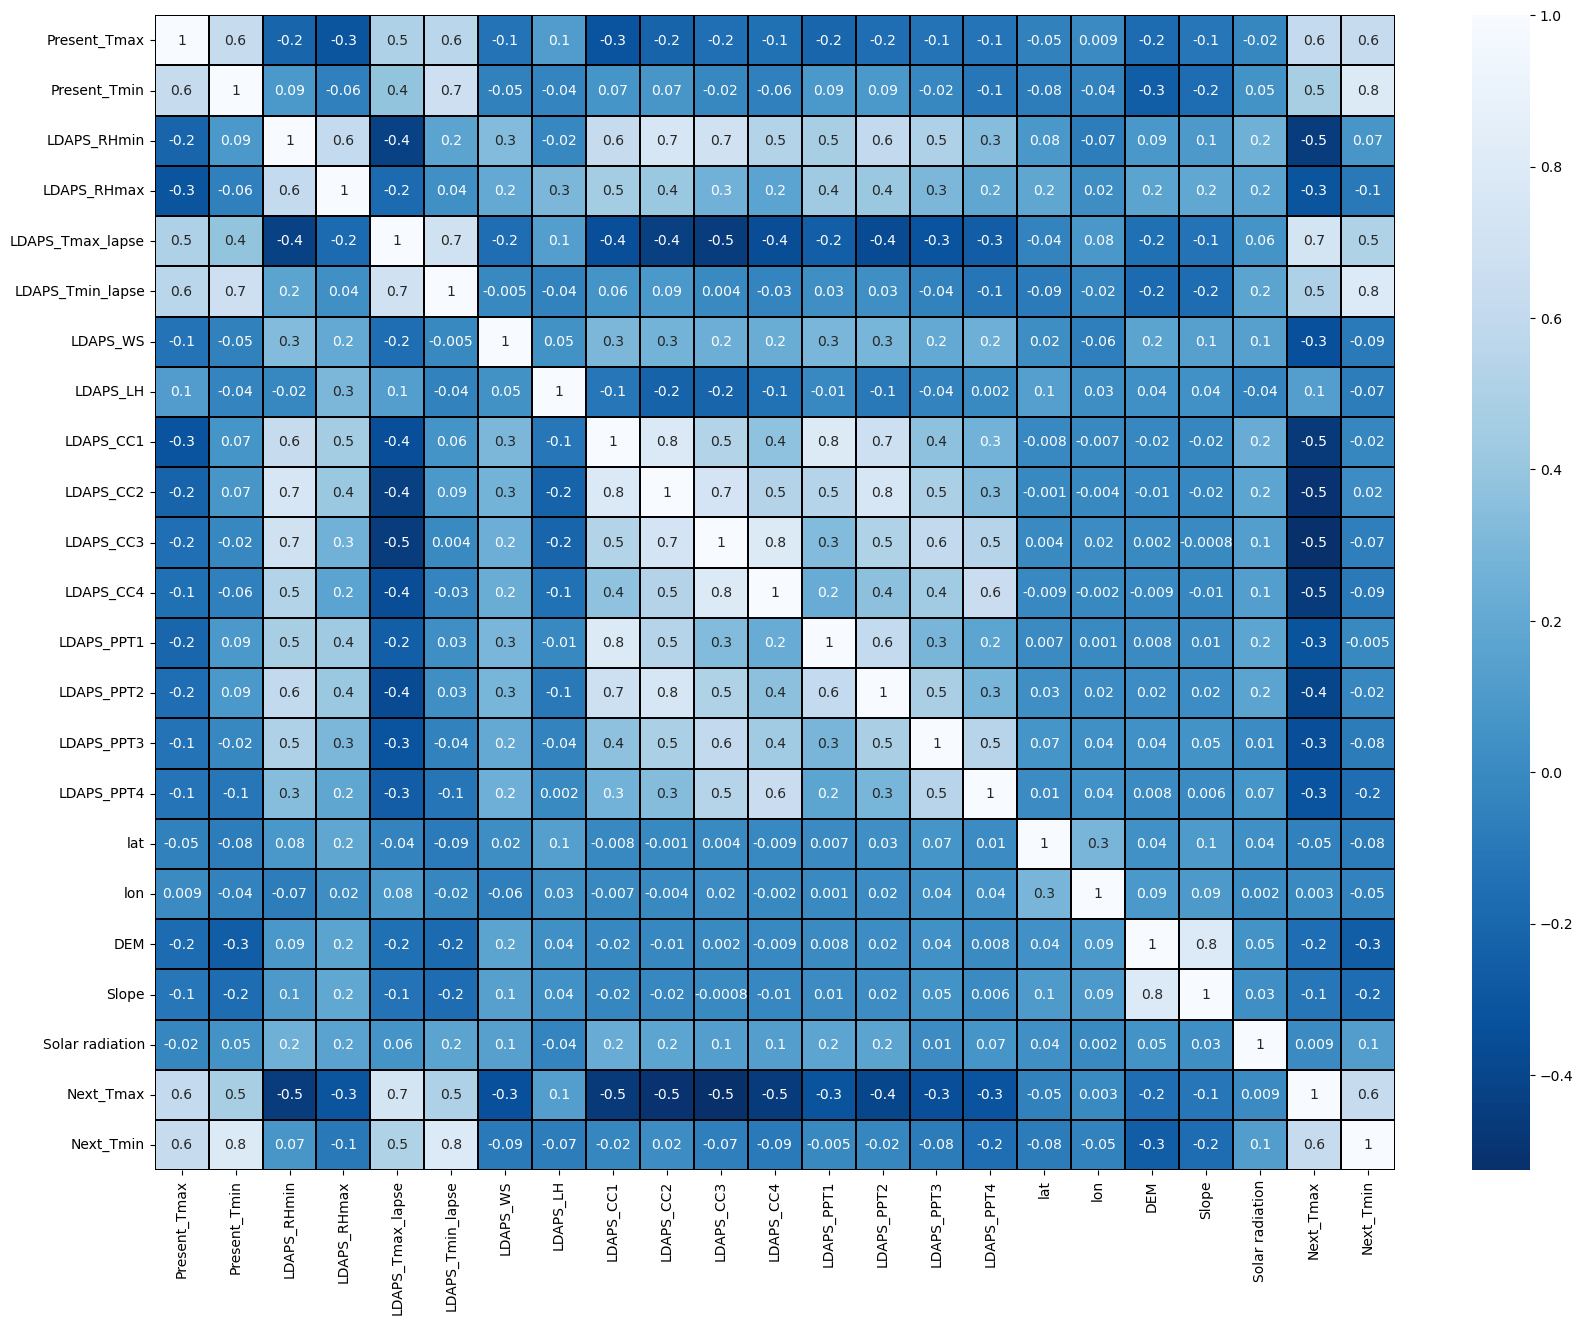

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Checked the correlation with the heatmap

In [54]:
x=df.drop(['Next_Tmax','Next_Tmin'], axis=1)
max_y=df['Next_Tmax']
min_y=df["Next_Tmin"]

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.365812,-0.762087,0.123286,0.392272,-0.450605,-0.166307,-0.017610,0.223466,-0.497849,-0.573957,...,-0.649048,-0.715453,-0.656327,-0.631541,-0.546972,1.189286,-0.005000,2.327694,1.271571,1.517935
1,0.715126,-0.678892,-0.275196,0.325954,0.111825,0.244438,-0.611985,-0.285944,-0.529859,-0.389214,...,-0.661611,-0.715453,-0.656327,-0.631541,-0.546972,1.189286,0.511177,-0.148505,-0.423351,1.229950
2,0.613788,0.028263,-0.512791,-0.533558,0.187995,0.456438,-0.367949,-1.198187,-0.591169,-0.367227,...,-0.605101,-0.715453,-0.656327,-0.631541,-0.546972,0.653021,0.838510,-0.490091,-0.865063,1.216534
3,0.748905,0.069860,0.122228,1.087971,0.065586,-0.038761,-0.635507,0.115133,-0.564511,-0.488652,...,-0.636015,-0.715453,-0.656327,-0.631541,-0.546972,1.991696,0.385280,-0.122836,1.149984,1.201176
4,0.546229,-0.554100,-0.015138,0.267679,-0.121416,0.025285,-0.587867,1.343649,-0.810917,-0.396068,...,-0.495614,-0.715453,-0.656327,-0.631541,-0.546972,0.118743,1.807917,-0.433902,-0.435918,1.207205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,-2.189893,-2.550773,-1.972389,-1.195091,-0.995759,-1.856817,-0.362249,0.299276,-1.271272,-1.048052,...,-1.162922,-0.715453,-0.656327,-0.631541,-0.546972,-0.149390,-1.263971,-1.227687,-1.160416,-2.093040
7748,-2.189893,-2.301189,-2.151982,-1.399224,-0.787415,-1.873661,-0.156759,-0.422528,-1.249123,-1.071485,...,-1.162922,-0.715453,-0.656327,-0.631541,-0.546972,-0.417522,-1.037356,-1.137368,-0.969766,-2.104553
7749,-2.223673,-2.425981,-2.225637,-1.405864,-0.493212,-1.957783,0.211070,-1.532173,-1.199513,-1.129729,...,-1.159798,-0.715453,-0.656327,-0.631541,-0.546972,-0.417522,-0.269384,-1.025223,-0.853417,-2.074325
7750,-3.304610,-4.963420,-2.434334,-3.778834,-3.758582,-3.655908,-2.555074,-2.192213,-1.385188,-1.360750,...,-1.162922,-0.715453,-0.656327,-0.631541,-0.546972,-1.758184,-2.082302,-1.417645,-1.372596,-2.358212


In [57]:
from sklearn.model_selection import train_test_split

max_X_train, max_X_test, max_y_train, max_y_test = train_test_split(x, max_y, test_size=0.2, random_state=42)
min_X_train, min_X_test, min_y_train, min_y_test = train_test_split(x, min_y, test_size=0.2, random_state=42)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,2.822886,Present_Tmax
1,2.574203,Present_Tmin
2,6.590659,LDAPS_RHmin
3,2.505597,LDAPS_RHmax
4,6.985737,LDAPS_Tmax_lapse
5,8.322412,LDAPS_Tmin_lapse
6,1.239504,LDAPS_WS
7,1.549935,LDAPS_LH
8,6.100775,LDAPS_CC1
9,6.379756,LDAPS_CC2


In [59]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

Creating the models for the dataset to predict the temparature

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(max_X_train, max_y_train)

LinearRegression()

In [65]:
max_y_pred = model.predict(max_X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(max_y_test, max_y_pred)
r2 = r2_score(max_y_test, max_y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 2.698433758024256
R-squared (R2) Score: 0.7237825810529073


In [66]:
import joblib
joblib.dump(model,"Next_Tmax.pkl")

['Next_Tmax.pkl']

In [67]:
model = joblib.load("Next_Tmax.pkl")
prediction = model.predict(max_X_test)
prediction

array([28.9509541 , 34.94413246, 27.6326124 , ..., 29.4109108 ,
       25.73951147, 28.39591175])

In [69]:
a = np.array(max_y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,28.950954,28.3
1,34.944132,35.9
2,27.632612,25.3
3,32.834474,35.9
4,31.328066,33.4
...,...,...
1546,32.120251,32.9
1547,31.550901,31.0
1548,29.410911,28.2
1549,25.739511,25.2


Predicted the maximum temperature from the dataset

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(min_X_train, min_y_train)

LinearRegression()

In [71]:
min_y_pred = model.predict(min_X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(min_y_test, min_y_pred)
r2 = r2_score(min_y_test, min_y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 1.2669088714886056
R-squared (R2) Score: 0.7967253746672477


In [73]:
import joblib
joblib.dump(model,"Next_Tmin.pkl")

['Next_Tmin.pkl']

In [74]:
model = joblib.load("Next_Tmin.pkl")
prediction = model.predict(min_X_test)
prediction

array([20.10477076, 27.91923194, 22.56341757, ..., 23.10870616,
       19.93244253, 22.11024888])

In [75]:
a = np.array(min_y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,20.104771,20.3
1,27.919232,27.5
2,22.563418,21.2
3,24.948127,25.2
4,25.289273,26.0
...,...,...
1546,22.484881,21.7
1547,23.387483,22.4
1548,23.108706,22.3
1549,19.932443,19.5


Predicted the minimum temparature from the dataset using the variours codes and models